In [39]:
!pip install xlrd pandas

# Bayesian Networks

In this notebool, we will use bnlearn package to generate Bayesian Networks, based on structure learning and parameter learning. The generated Bayesian Networks will be used for inference. Using bnlearn package to learn a Bayesian network can be split into two problems:

- Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.

- Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.

### Example: Building Bayesian Network and making inferences with Sprinkler data set

In [40]:
import bnlearn as bn

# load the Sprinkler dataset
df = bn.import_example()

df

[bnlearn] >Import dataset..


,Cloudy,Sprinkler,Rain,Wet_Grass
0,0,0,0,0
1,1,0,1,1
2,0,1,0,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,1,0,1,1
996,1,0,1,1
997,1,0,1,1
998,0,0,0,0


Finding Elimination Order: : 100%|██████████| 6/6 [00:43<00:00,  7.24s/it]

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


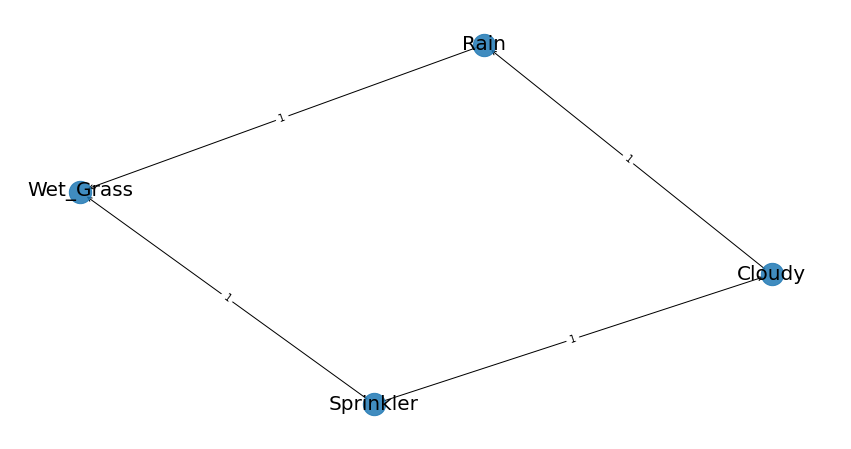

In [41]:
# Structure Learning: obtaining the network structure

model = bn.structure_learning.fit(df)

G = bn.plot(model)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of Cloudy:
+-----------+--------------------+--------------------+
| Sprinkler | Sprinkler(0)       | Sprinkler(1)       |
+-----------+--------------------+--------------------+
| Cloudy(0) | 0.3988245172124265 | 0.6341161928306551 |
+-----------+--------------------+--------------------+
| Cloudy(1) | 0.6011754827875735 | 0.3658838071693449 |
+-----------+--------------------+--------------------+
CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518219 | 0.6630434782608695  |
+---------+--------------------+---------------------+
CPD of Sprinkler:
+--------------+--------+
| Sprinkler(0) | 0.5955 |
+---------

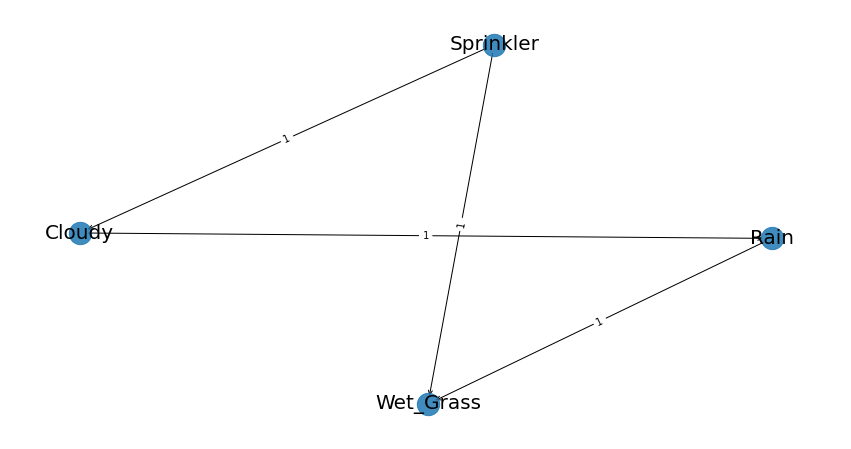

In [42]:
# learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype="bayes")

# Make plot
G = bn.plot(model_update)

In [43]:
# performing inference
q_1 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Cloudy':1,'Sprinkler':0, 'Rain':1})
q_2 = bn.inference.fit(model_update, variables=['Wet_Grass'], evidence={'Rain':1})

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[bnlearn] >Variable Elimination..
+--------------+------------------+
| Wet_Grass    |   phi(Wet_Grass) |
+==============+==================+
| Wet_Grass(0) |           0.2559 |
+--------------+------------------+
| Wet_Grass(1) |           0.7441 |
+--------------+------------------+
[bnlearn] >Variable Elimination..



Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: Cloudy:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: Sprinkler: 100%|██████████| 2/2 [00:00<00:00, 235.25it/s]

+--------------+------------------+
| Wet_Grass    |   phi(Wet_Grass) |
+==============+==================+
| Wet_Grass(0) |           0.3014 |
+--------------+------------------+
| Wet_Grass(1) |           0.6986 |
+--------------+------------------+


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

Learn a Bayesian Network of the artificial smart grid data set. Construct the network make inference for the following:

- P(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium)
- P(Demand_Factor=High | Overload=Yes, Weather=Cold)
- P(Number_of_Customers=Low | Demand_Factor=High)


Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 62.50it/s]


Index(['Season', 'Outage_Duration', 'Number_of_Customers', 'Overload',
       'Weather', 'Time', 'Demand_Factor', 'Day'],
      dtype='object')
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


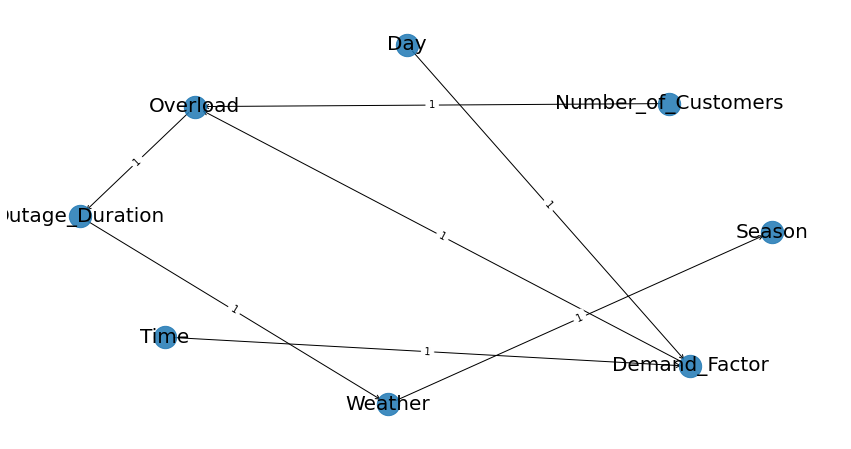

,Season,Outage_Duration,Number_of_Customers,Overload,Weather,Time,Demand_Factor,Day
0,Autumn,Less_than_1H,Low,Yes,Cold,Morning,Low,Weekdays
1,Winter,Less_than_1H,Low,No,Cold,Evening,Low,Weekdays
2,Spring,More_than_1H,Low,No,Cold,Evening,Low,Weekdays
3,Winter,Less_than_1H,High,No,Warm,Morning,Low,Weekdays
4,Spring,More_than_1H,Low,No,Cold,Morning,Low,Weekend
...,...,...,...,...,...,...,...,...
695,Autumn,Less_than_1H,Low,Yes,Cold,Afternoon,High,Weekend
696,Summer,More_than_1H,Low,No,Warm,Evening,Medium,Weekend
697,Winter,Less_than_1H,High,Yes,Cold,Evening,Medium,Weekdays
698,Autumn,More_than_1H,Low,No,Cold,Afternoon,High,Weekend


In [44]:
import pandas as pd

file = "./smart_grid.xlsx"

df_sg = data = pd.read_excel(file)

print(df_sg.columns)

model_df_sg = bn.structure_learning.fit(df_sg)
G_dg = bn.plot(model_df_sg)
df_sg

In [45]:
model_Outage_Duration = bn.parameter_learning.fit(model_df_sg, df_sg, methodtype="bayes")
DF_1 = bn.inference.fit(model_Outage_Duration, variables=['Outage_Duration'], evidence={'Time':'Morning','Demand_Factor':'Medium'})
print('\nP(Outage_Duration=Less_than_1H | Time=Morning, Demand_Factor=Medium):', DF_1.values[0])


[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]

Eliminating: Overload: 100%|██████████| 5/5 [00:00<00:00, 285.68it/s]


[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
CPD of Weather:
+-----------------+-------------------------------+-------------------------------+
| Outage_Duration | Outage_Duration(Less_than_1H) | Outage_Duration(More_than_1H) |
+-----------------+-------------------------------+-------------------------------+
| Weather( Cold)  | 0.5067319461444308            | 0.579841449603624             |
+-----------------+---------------

In [46]:
model_Demand_Fact = bn.parameter_learning.fit(model_df_sg, df_sg, methodtype="bayes")
DF_2 = bn.inference.fit(model_Demand_Fact, variables=['Demand_Factor'], evidence={'Overload':'Yes','Weather':' Cold'})
print('\nP(Demand_Factor=High | Overload=Yes, Weather=Cold):',DF_2.values[0])

Eliminating: Time: 100%|██████████| 5/5 [00:00<00:00, 238.25it/s]  

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
CPD of Weather:
+-----------------+-------------------------------+-------------------------------+
| Outage_Duration | Outage_Duration(Less_than_1H) | Outage_Duration(More_than_1H) |
+-----------------+-------------------------------+-------------------------------+
| Weather( Cold)  | 0.5067319461444308            | 0.

In [47]:
model_No_of_Cust = bn.parameter_learning.fit(model_df_sg, df_sg, methodtype="bayes")
DF_3 = bn.inference.fit(model_No_of_Cust, variables=['Number_of_Customers'], evidence={'Demand_Factor':'High'})
print('\nP(Number_of_Customers=Low | Demand_Factor=High):',DF_3.values[1])


[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.


Eliminating: Season:   0%|          | 0/6 [00:00<?, ?it/s]

CPD of Outage_Duration:
+-------------------------------+--------------------+---------------------+
| Overload                      | Overload(No)       | Overload(Yes)       |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(Less_than_1H) | 0.3964248159831756 | 0.5874499332443258  |
+-------------------------------+--------------------+---------------------+
| Outage_Duration(More_than_1H) | 0.6035751840168244 | 0.41255006675567424 |
+-------------------------------+--------------------+---------------------+
CPD of Weather:
+-----------------+-------------------------------+-------------------------------+
| Outage_Duration | Outage_Duration(Less_than_1H) | Outage_Duration(More_than_1H) |
+-----------------+-------------------------------+-------------------------------+
| Weather( Cold)  | 0.5067319461444308            | 0.579841449603624             |
+-----------------+-------------------------------+-------------------------------+
|


Eliminating: Overload: 100%|██████████| 6/6 [00:00<00:00, 292.70it/s]

+---------------------------+----------------------------+
| Number_of_Customers       |   phi(Number_of_Customers) |
+===========================+============================+
| Number_of_Customers(High) |                     0.4612 |
+---------------------------+----------------------------+
| Number_of_Customers(Low)  |                     0.5388 |
+---------------------------+----------------------------+

P(Number_of_Customers=Low | Demand_Factor=High): 0.5388235294117647
